# Isosteric Transformations

In [1]:
def apply_rxn(rxn, mol_in, verbose=False):

    """
    Apply a resction to a molecule exhausively.
    """
    
    max_passes = 10

    mols = [mol_in]

    changed = False

    for n_pass in range(1, max_passes+1):

        if verbose: logging.info("> starting pass {}...".format(n_pass))

        products = {}

        for mol in mols:

            for product in [x[0] for x in rxn.RunReactants((mol,))]:

                try:

                    Chem.SanitizeMol(product)

                    smiles = Chem.MolToSmiles(product, isomericSmiles=True)

                except ValueError as error:

                    continue # We are assuming this simply means an unphysical molecule has been generated

                if smiles in products: continue # Keep only new structures
                
                products[smiles] = product

        if products:

            changed = True

            if verbose: logging.debug("\t> there are {} products: will continue".format(len(products.values())))

            mols = products.values() # Update list of mols

        else:

            if verbose: logging.info("\t> there were no products: will return")

            break

    if verbose:
        
        if n_pass == max_passes: logging.info("> maximum number of passes reached; current number of mols is {}".format(len(mols)))
        
        logging.info('=' * 100)

    return mols[0] if changed else mol_in

# apply_rxn

## Thiophene to Benzene

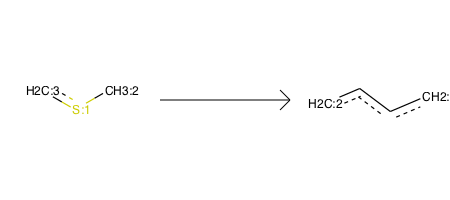

In [19]:
rxn = AllChem.ReactionFromSmarts('[sv2:1]([c:2])[c:3]>>[c:2]cc[c:3]') # Loose: Any aromatic sulphur

# rxn = AllChem.ReactionFromSmarts('[sv2$(*1cccc1):1]([c:2])[c:3]>>[c:2]cc[c:3]') # Strict: thiophene only

rxn

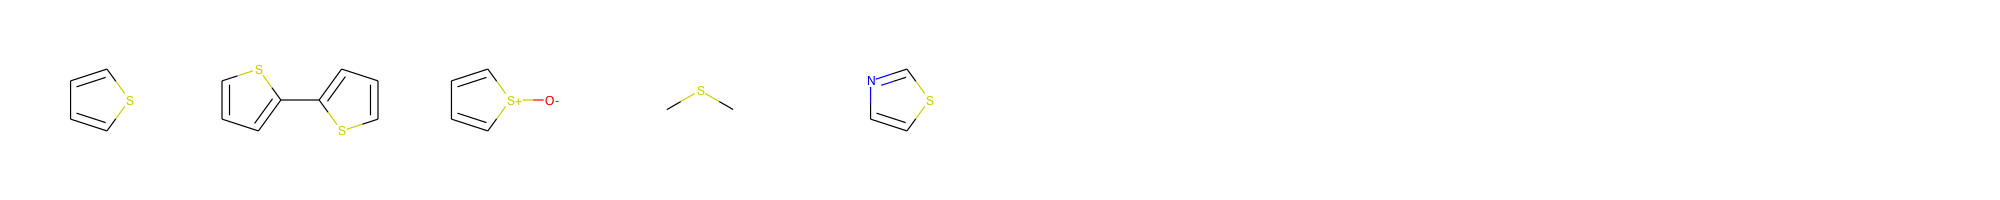

In [20]:
mols_in = [Chem.MolFromSmiles(x) for x in ['s1cccc1', 's1cccc1c2cccs2', '[O-][s+]1cccc1', 'CSC', 's1cncc1']]

Draw.MolsToGridImage(mols_in, molsPerRow=10)

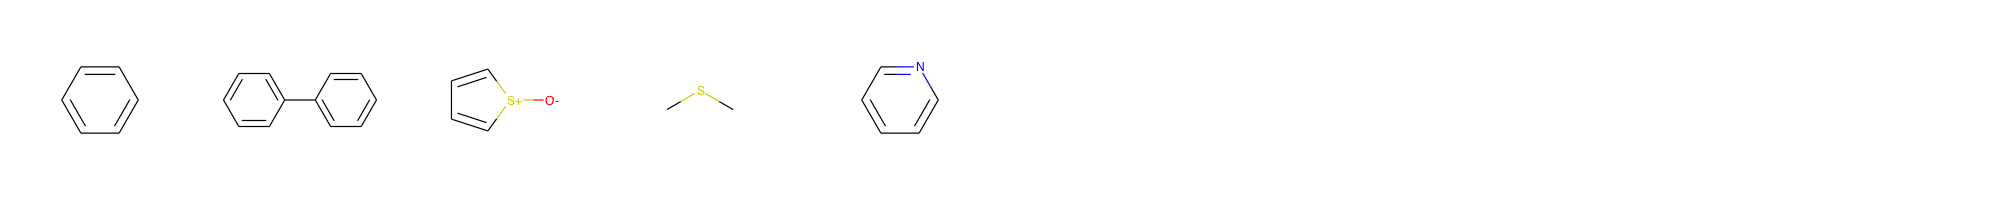

In [14]:
mols_out = [apply_rxn(rxn, x) for x in mols_in]

Draw.MolsToGridImage(mols_out, molsPerRow=10)

## Aliphatic Chain

Reduce homologated aliphatic chains.

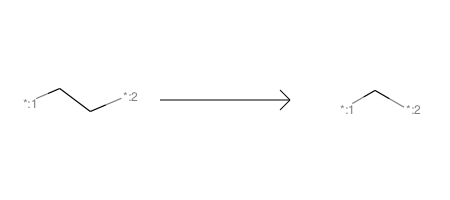

In [21]:
rxn = AllChem.ReactionFromSmarts('[*:1][CH2,$([O,S;X2]([CH2])[CH2])][CH2,$([O,S;X2]([CH2])[CH2])][*:2]>>[*:1][CH2][*:2]')

rxn

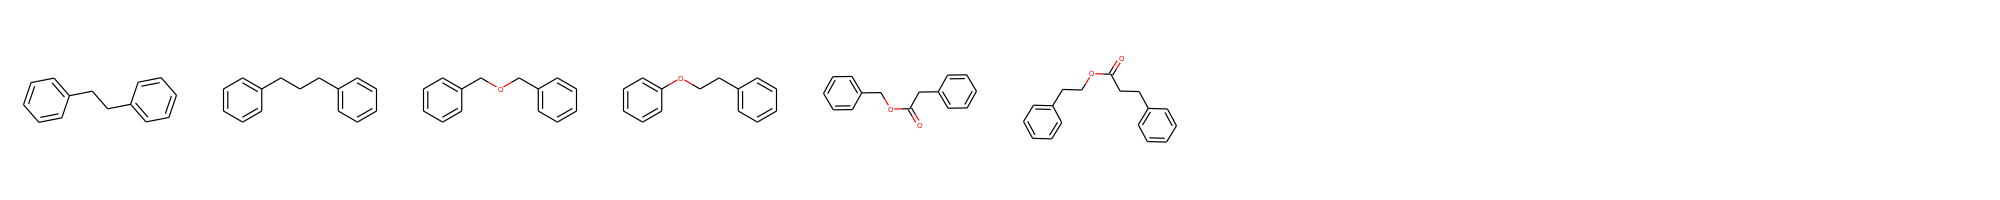

In [22]:
mols_in = [Chem.MolFromSmiles(x) for x in ['c1ccccc1CCc2ccccc2', 'c1ccccc1CCCc2ccccc2', 'c1ccccc1COCc2ccccc2', 'c1ccccc1OCCc2ccccc2', 'c1ccccc1COC(=O)Cc2ccccc2', 'c1ccccc1CCOC(=O)CCc2ccccc2']]

Draw.MolsToGridImage(mols_in, molsPerRow=10)

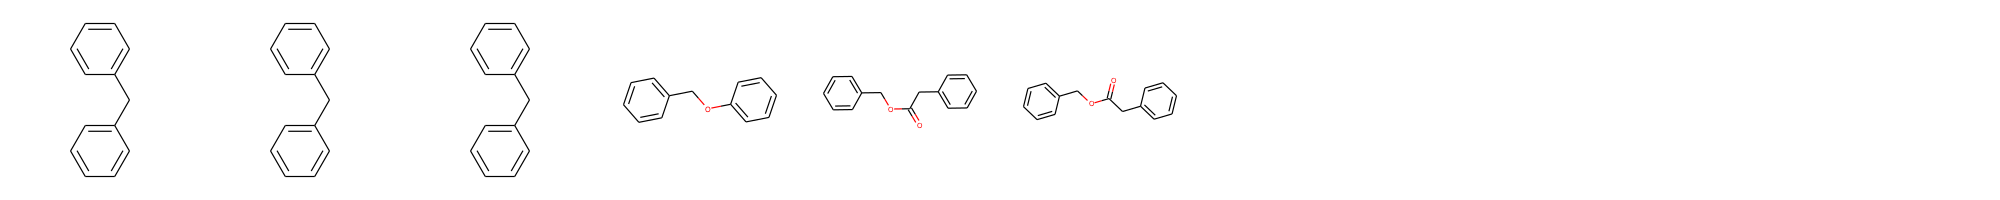

In [23]:
mols_out = [apply_rxn(rxn, x) for x in mols_in]

Draw.MolsToGridImage(mols_out, molsPerRow=10)